# Decision Trees on Telco-Customer-Churn Data.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

#### Use pandas pd.read_csv method to read in WA_Fn-UseC_-Telco-Customer-Churn.csv data and call it data. 

In [70]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

* We use the dataframe.head() function to take a look at the first 5 rows of our data.

In [71]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Lets use the Pandas dataframe.info() function to get a concise summary of the dataframe. 

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [73]:
# Use df.replace()function on the column to change the variable to an interger.
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)

In [74]:
# Use df.replace()function on the  column to change the variable to an interger.
data['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [75]:
# Use df.replace()function on the  column to change the variable to an interger.
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)

In [76]:
# Use df.replace()function on the column to change the variable to an interger.
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [77]:
# Use df.replace()function on the column to change the variable to an interger.
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)

In [78]:
# Use df.replace()function on the to change the variable to an interger.
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)

In [79]:
# Use df.replace()function on the column to change the variable to an interger.
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [80]:
# Use df.replace()function on the column to change the variable to an interger.
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)

In [81]:
# Use df.replace()function on the column to change the variable to an interger.
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)

In [82]:
# Use df.replace()function on the column to change the variable to an interger.
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [83]:
# Use df.replace()function on the column to change the variable to an interger.
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [84]:
# Use df.replace()function on the column to change the variable to an interger.
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [85]:
# Use df.replace()function on the column to change the variable to an interger.
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [86]:
# Use df.replace()function on the column to change the variable to an interger.
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)

In [87]:
# Use df.replace()function on the column to change the variable to an interger.
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [88]:
# Use df.replace()function on the column to change the variable to an interger.
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [91]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


* Use df.corr() function to get the correlation values of the dataframe.

In [111]:
#since TotalCharges is an object, we have to convert it to a float.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [112]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.010380,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,-0.000126,0.011754,0.005209,0.014569,-0.000048,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102411,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.319072,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.064653,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.825880,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113008,0.011942
MultipleLines,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.469042,0.040102
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428212,0.316846
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412619,-0.171226
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.510100,-0.082255


* Now lets use the corr from above to create a visualization of the corr.


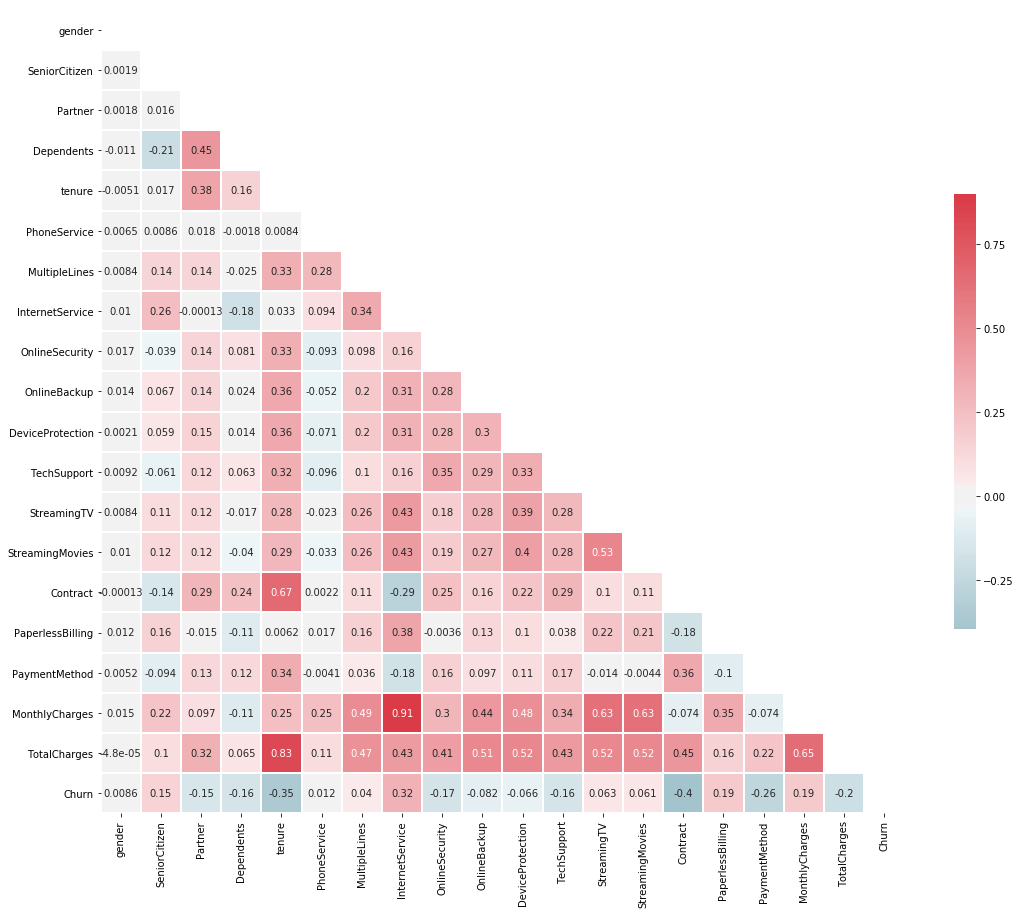

In [118]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=1, annot = True, cbar_kws={"shrink": .5})

### Split your data into train and test sets. 

In [114]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

* Drop customerID and Totalcharges columns.

In [121]:
data = data.drop(['customerID'], axis=1)

In [125]:
y = data['Churn']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7) # 80% training and 20% test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(5634, 20) (5634,)
(1409, 20) (1409,)


In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
